# Modelamiento del problema de control óptimo

Se busca maximizar la ganancia total obtenida de la pesca de ambas especies en un dominio temporal $[0,T]$ la cual se modela mediante
$$
J = \int_0^T (p_1x(t) + p_2y(t) - c)E(t) e^{-\delta t} dt
$$
donde $p_1$ y $p_2$ son los precios por unidad de biomasa de las especies presa y depredadora respectivamente, $c$ es el costo de pesca por unidad de esfuerzo, y $\delta$ es la tasa de descuento (intereses).
Entonces, el problema de control óptimo queda planteado como:
$$
\min_{E \in \mathcal{U}} - J(x_0, y_0, E)
$$
con $U=[0, E_{max}]$ sujeto a la dinámica del sistema anterioremente definida:
$$
\begin{cases}
    \dot x = rx(1-\frac{x}{K}) - axy-q_1xE\\
    \dot y = abxy-my-q_2yE\\
    x(0) = x_0\\
    y(0) = y_0
\end{cases}
$$
Ya que no hay restricciones sobre el estado final, el conjunto objetivo es $\tau = {T} \times \mathbb{R}_+^2$. Definimos el conjunto de controles admisibles como
$$
\mathcal{U} = \{ E(t) \in L^\infty ([0,T]; U) \mid t(E) \gt T \}
$$

Ya que el problema a trabajar es uno de Lagrange con $\ell = -(p_1 x(t) + p_2 y(t)-c) E(t) e^{-\delta t}$, por lo que el Hamiltoniano queda definido como:
$$
H = -(p_1 x + p_2 y - c) E e^{-\delta t} + s_1 [rx(1-\frac{x}{K}) - axy - q_1 x E] + s_2 [abxy - my - q_2 y E]
$$
con $s = (s_1, s_2)$ el vector de co-estados
$$
\begin{cases}
    \dot s_1 = -\frac{\partial H}{\partial x} =  p_1 E e^{-\delta t} - s_1 [r(1-\frac{2x}{K}) - ay - q_1 E] - s_2 ab y\\
    \dot s_2 = -\frac{\partial H}{\partial y} = p_2 E e^{-\delta t} + s_1 a x - s_2 [ab x - m - q_2 E]
\end{cases}
$$
con las condiciones de transversalidad veamos si se pueden obtener más datos, en este caso como no hay restricciones sobre el estado final, se tiene que $d_{x_f} \in \mathbb{R}$, mientras que como $x_{t_0}$, $t_f$ y $t_0$ son fijos, entonces $d_{x_0} = 0$, $d_{t_f} = 0$ y $d_{t_0} = 0$, por esto estudiemos primero dg para luego ver como quedan las condiciones de transversalidad:

$$
 dg = \frac{\partial g}{\partial x_0} d_{x_0} + \frac{\partial g}{\partial t_0} d_{t_0} + \frac{\partial g}{\partial x_f} d_{x_f} + \frac{\partial g}{\partial t_f} d_{t_f} = \frac{\partial g}{\partial x_f} d_{x_f}
$$

Pero, como $g(x_f) = 0$ puesto que se tiene un problema de lagrange, entonces solo resta estudiar los otros terminos que aparecen en las condiciones de transversalidad:
$$
dg + [\Theta(t_i)dt_i - p(t_i)^Tdt_i]^{t_f}_{t_0} = 0
$$

En este caso se tiene igualdad, dado que B' es un espacio vectorial, por lo que se puede escribir como:
$$
\begin{align*}
    dg + [\Theta(t_i)dt_i - p(t_i)^Tdx_{t_i}]^{t_f}_{t_0} &= 0*d_{x_f} + \Theta(t_f)dt_f - p(t_f)^Tdx_{t_f} - \Theta(t_0)dt_0 - p(t_0)^Tdx_{t_0} = 0\\
    0 &= \Theta(t_f)*0 + p(t_f)^Tdx_f - \Theta(t_0)*0 - p(t_0)^T*0 \\
    0 &= p(t_f)^Tdx_f\\
\end{align*}
$$
Como $d_{x_f} \in \mathbb{R}$, entonces se tiene que $p(t_f) = 0$, por lo que las condiciones de transversalidad quedan como:
$$
\begin{align*}
    p(t_f) &= 0\\
\end{align*}
$$
Con esto, por el problema se conoce $x_0$ y además $p(t_f) = 0$, con ello podemos implementar el método de tiro para resolver el problema de control óptimo.

Tenemos que el control $E(t)$ es tal que minimiza el hamiltoniano, por lo que para casi todo tiempo $t \in [0,T]$ se cumple:
$$
E(t) \in \arg \min_{E \in U} H(x(t), y(t), s(t), E, t)
$$
matraqueando el hamiltoniano se obtiene:
$$
\begin{align*}
    \arg \min_{E \in U} H(x(t),y(t),s(t),E,t) &= \arg \min_{E \in U} \left( -(p_1 x(t) + p_2 y(t) - c) E e^{-\delta t} - s_1(t) q_1 x(t) E - s_2(t) q_2 y(t) E \right)\\
    &= \arg \min_{E \in U} \left( -(p_1x+p_2y-c)e^{-\delta t} - s_1 q_1 x  - s_2 q_2 y\right) E
\end{align*}
$$
Ya que el control es acotado y no negativo, este obedece:
$$
\begin{align*}
E^*(t) &=
\begin{cases}
    E_{\text{max}} & \text{si } \phi(t) < 0\\
    0 & \text{si } \phi(t) > 0\\
    \text{indeterminado} & \text{si } \phi(t) = 0
\end{cases},\\
\phi(t) &=  -(p_1x(t)+p_2y(t)-c)e^{-\delta t} - s_1(t) q_1 x(t)  - s_2(t) q_2 y(t)
\end{align*}
$$
En forma de función indicatriz:
$$
E^*(t) = E_{\text{max}} \cdot \mathbb{1}_{\{\phi(t) < 0\}}(t)
$$

# Simulaciones numéricas, validación del modelo y análisis de la dinámica óptima
## OptimalControl.jl

In [2]:
using Pkg
Pkg.activate(".")

  Activating project at `~/proyects/pescado-controlado`


In [3]:
using OptimalControl
using DifferentialEquations
using Plots
using LaTeXStrings
using NLPModelsIpopt

In [4]:
# Parámetros del sistema presa-depredador con control de pesca
# p = [r, K, m, b, a, q1, q2, E, p1, p2, c, δ]

# Parámetros biológicos
r = 0.5      # Tasa de crecimiento de presas (año⁻¹)
K = 1000.0   # Capacidad de carga (toneladas)
m = 0.3      # Mortalidad natural de depredadores (año⁻¹)
b = 0.4      # Eficiencia de conversión presa→depredador
a = 0.001    # Tasa de depredación (toneladas⁻¹·año⁻¹)

# Parámetros de captura
q1 = 0.005  # Capturabilidad de presas
q2 = 0.01   # Capturabilidad de depredadores (más fáciles de capturar)

# Control
E_max = 300.0 # Esfuerzo máximo permitido

# Parámetros económicos
p1 = 100.0   # Precio por tonelada de presa ($/ton)
p2 = 200.0   # Precio por tonelada de depredador ($/ton) - más valioso
c = 50.0     # Costo por unidad de esfuerzo ($/día·barco)
δ = 0.05     # Tasa de descuento anual (5%)

# Vector de parámetros completo
params = [r, K, m, b, a, q1, q2, p1, p2, c, δ]

# Condiciones iniciales razonables
x0 = 500.0   # Población inicial de presas (50% de K)
y0 = 100.0   # Población inicial de depredadores

100.0

In [22]:
ocp = @def begin
    t ∈ [0.0, 500.0], time
    z = (x, y) ∈ R^2, state
    E ∈ R, control
    0 ≤ E(t) ≤ E_max
    
    z(0) == [x0, y0]
    ∂(z)(t) == [r*x(t)*(1 - x(t)/K) - a*x(t)*y(t) - q1*E(t)*x(t),
                b*a*x(t)*y(t) - m*y(t) - q2*E(t)*y(t)]
    ∫(exp(-δ*t) * (p1*q1*E(t)*x(t) + p2*q2*E(t)*y(t) - c*E(t))) → max
end

Abstract definition:

    t ∈ [0.0, 500.0], time
    z = ((x, y) ∈ R ^ 2, state)
    E ∈ R, control
    0 ≤ E(t) ≤ E_max
    z(0) == [x0, y0]
    (∂(z))(t) == [(r * x(t) * (1 - x(t) / K) - a * x(t) * y(t)) - q1 * E(t) * x(t), (b * a * x(t) * y(t) - m * y(t)) - q2 * E(t) * y(t)]
    ∫(exp(-δ * t) * ((p1 * q1 * E(t) * x(t) + p2 * q2 * E(t) * y(t)) - c * E(t))) → max

The (non autonomous) optimal control problem is of the form:

    minimize  J(z, E) = ∫ f⁰(t, z(t), E(t)) dt, over [0.0, 500.0]

    subject to

        ż(t) = f(t, z(t), E(t)), t in [0.0, 500.0] a.e.,

        ϕ₋ ≤ ϕ(z(0.0), z(500.0)) ≤ ϕ₊, 
        u₋ ≤ E(t) ≤ u₊, 

    where z(t) = (x(t), y(t)) ∈ R² and E(t) ∈ R.


In [23]:
sol = solve(ocp)

▫ This is OptimalControl version v1.1.6 running with: direct, adnlp, ipopt.

▫ The optimal control problem is solved with CTDirect version v0.17.4.

   ┌─ The NLP is modelled with ADNLPModels and solved with NLPModelsIpopt.
   │
   ├─ Number of time steps⋅: 250
   └─ Discretisation scheme: midpoint

▫ This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:     2502
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2252

Total number of variables............................:      752
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      250
                     variables with only upper bounds:        0
Total number of equality constraints.................:      502
Total number of inequality constraints...............:        0
        inequality constraints with only lower b

• Solver:
  ✓ Successful  : true
  │  Status     : first_order
  │  Message    : Ipopt/generic
  │  Iterations : 120
  │  Objective  : 213669.9268231166
  └─ Constraints violation : 2.2737367544323206e-13

• Boundary duals: [-104.1974639507144, -169.69899640085046]


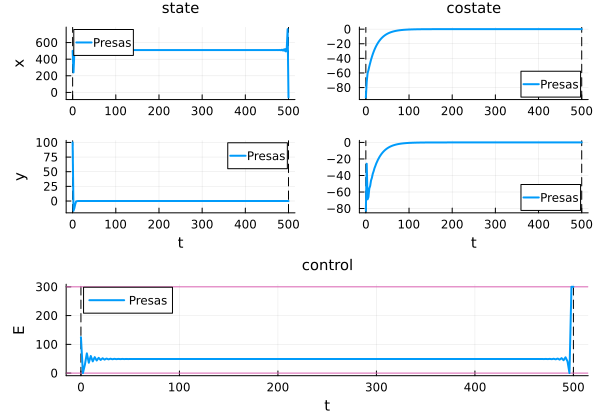

In [24]:
plot(sol, vars=(0, (z->z[1])), label="Presas", xlabel="Tiempo (años)", ylabel="Población", title="Dinámica de Presas y Depredadores bajo Control de Pesca")

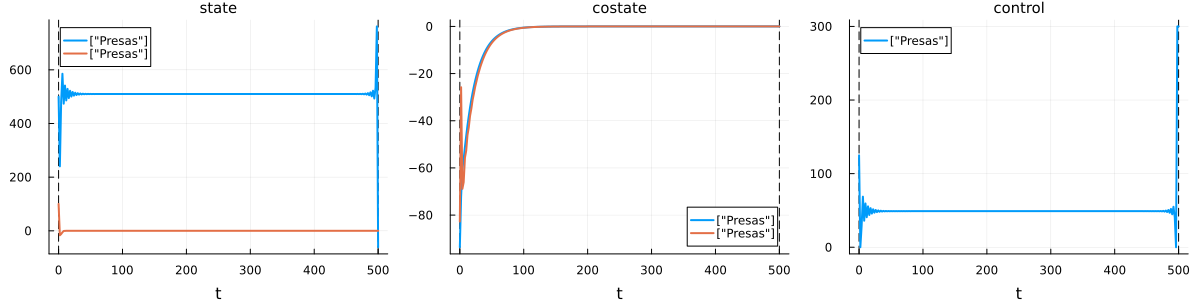

In [25]:
plot(sol; layout=:group, size=(1200,300), label=["Presas"])

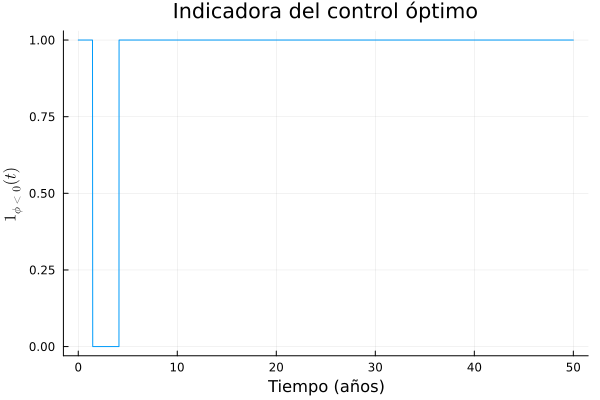

In [27]:
x = state(sol)
p = costate(sol)

function phi(t)
    exp(-δ*t)*(-p1*q1*x(t)[1] - p2*q2*x(t)[2] + c) - p(t)[1]*q1*x(t)[1] - p(t)[2]*q2*x(t)[2]
end

phi_indicator(t) = phi(t) < 0 ? 1.0 : 0.0

plot(t->phi_indicator(t), 0, 50, xlabel="Tiempo (años)", ylabel=L"1_{φ<0}(t)", title="Indicadora del control óptimo", legend=false)

En control obtenido por la librería OptimalControl.jl no respeta las condiciones de optimalidad obtenidas por PMP, por lo que se procede a probar el modelo obtenido implementando la dinámica usando diferentialequations.jl y comparando los resultados.
## Solución del PMP

In [ ]:
function fish_control!(du, u, p, t)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = p
    function phi(t)
        exp(-δ*t)*(-p1*q1*u[1] - p2*q2*u[2] + c) - u[3]*q1*u[1] - u[4]*q2*u[2]
    end
    function optimal_E(t)
        phi(t) < 0 ? E_max : 0.0
    end
    E = optimal_E(t)
    du[1] = r * x * (1 - u[1] / K) - a * u[1] * u[2] - q1 * u[1] * E
    du[2] = a * b * u[1] * u[2] - m * u[2] - q2 * u[2] * E
    du[3] = p1 * E * exp(-δ*t) - u[3] * (r * (1 - 2 * u[1] / K) - a * u[2] - q1 * E) - u[4] * (a * b * u[2])
    du[4] = p2 * E * exp(-δ*t) - u[3] * a * u[1] - u[4] * (a * b * u[1] - m - q2 * E)
end

function bca!(res, u, p, t)
    res[1] = u[1]-x0
    res[2] = u[2]-y0

end

function bcb!(res, u, p, t)
    res[3] = u[3]
    res[4] = u[4]
end
u0 = [0, 0, 0, 0]
tspan = (0.0, 500.0)
fun = BVPFunction(fish_control!, bc!)
prob = BVProblem(fun, u0, tspan, params)

BVProblem with uType Vector{Int64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 500.0)
u0: 4-element Vector{Int64}:
 0
 0
 0
 0

In [39]:
sol = solve(prob,
    Ascher4(; zeta = [0.0, 0.0, 500.0, 500], jac_alg = BVPJacobianAlgorithm(AutoForwardDiff()));
    dt = 0.01)

LoadError: MethodError: no method matching rank(::LinearAlgebra.UniformScaling{Bool})
The function `rank` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  rank([91m::SparseArrays.SPQR.QRSparse[39m)
[0m[90m   @[39m [36mSparseArrays[39m [90m~/.julia/juliaup/julia-1.12.0+0.x64.linux.gnu/share/julia/stdlib/v1.12/SparseArrays/src/solvers/[39m[90m[4mspqr.jl:374[24m[39m
[0m  rank([91m::LinearAlgebra.CholeskyPivoted[39m)
[0m[90m   @[39m [33mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.12.0+0.x64.linux.gnu/share/julia/stdlib/v1.12/LinearAlgebra/src/[39m[90m[4mcholesky.jl:894[24m[39m
[0m  rank([91m::Distributions.InverseWishart[39m)
[0m[90m   @[39m [32mDistributions[39m [90m~/.julia/packages/Distributions/psM3H/src/matrix/[39m[90m[4minversewishart.jl:78[24m[39m
[0m  ...
